Nice way to visualize toy networks:
https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.62505&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [1]:
### Classification
import torch
from torch import nn

import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
n_samples = 1000

X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

X.shape, y.shape

((1000, 2), (1000,))

In [3]:
X.dtype

dtype('float64')

In [4]:
y.dtype

dtype('int64')

In [5]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0], dtype=int64))

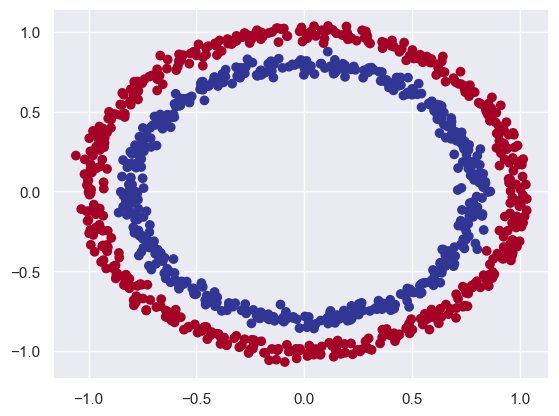

In [6]:
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "y": y})
# circles

plt.scatter(circles["X1"], circles["X2"], c=circles["y"], cmap=plt.cm.RdYlBu)

In [7]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X.dtype

torch.float32

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
len(X_train), len(X_test)

(800, 200)

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [11]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=5)
        self.layer2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer2(self.layer1(x))
    
model_0 = CircleModelV0().to(device)
next(model_0.parameters()).device

device(type='cuda', index=0)

In [12]:
# model_0 = nn.Sequential(
#     nn.Linear(in_features=2, out_features=5),
#     nn.Linear(in_features=5, out_features=1)
# ).to(device)

In [13]:
model_0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.1682, -0.4287],
                      [ 0.2740,  0.6062],
                      [ 0.5677, -0.2123],
                      [-0.1349, -0.3506],
                      [-0.3408, -0.2470]], device='cuda:0')),
             ('layer1.bias',
              tensor([-0.4682,  0.6427, -0.5671, -0.2571,  0.3823], device='cuda:0')),
             ('layer2.weight',
              tensor([[ 0.0022, -0.4292,  0.4336,  0.0384,  0.4380]], device='cuda:0')),
             ('layer2.bias', tensor([-0.1916], device='cuda:0'))])

In [14]:
model_0.eval()
with torch.inference_mode():
    untrained_preds = model_0(X.to(device))
    
untrained_preds[:10]

tensor([[-0.6860],
        [-0.6103],
        [-0.6183],
        [-0.8758],
        [-0.1423],
        [-0.8658],
        [-0.9379],
        [-0.6466],
        [-0.1757],
        [-1.0388]], device='cuda:0')

In [15]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

In [16]:
def accuracy_fn(y_true: torch.Tensor, y_pred: torch.Tensor) -> torch.Tensor:
    return torch.eq(y_true, y_pred).sum().item() / len(y_pred)

In [17]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))
    
y_logits[:5]

tensor([[-0.8714],
        [-1.0131],
        [-0.3894],
        [-1.0084],
        [-0.2139]], device='cuda:0')

In [18]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [19]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.2950],
        [0.2664],
        [0.4039],
        [0.2673],
        [0.4467]], device='cuda:0')

In [20]:
torch.round(y_pred_probs)[:5]

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

In [21]:
y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))
y_pred_labels[:5]

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0', grad_fn=<SliceBackward0>)

In [22]:
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

### Training loop

In [23]:
y_logits[:5].dtype

torch.float32

In [24]:
y_train[:5].dtype

torch.float32

In [25]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 100

for epoch in range(epochs):
    model_0.train()
    
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if (epoch + 1) % 10 == 0:
        model_0.eval()
        with torch.inference_mode():
            test_logits = model_0(X_test).squeeze()
            test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)

        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {100*acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {100*test_acc:.2f}%")
       

Epoch: 9 | Loss: 0.71179, Accuracy: 41.25% | Test Loss: 0.70228, Test Accuracy: 47.00%
Epoch: 19 | Loss: 0.70117, Accuracy: 46.62% | Test Loss: 0.69354, Test Accuracy: 51.00%
Epoch: 29 | Loss: 0.69777, Accuracy: 48.12% | Test Loss: 0.69131, Test Accuracy: 53.50%
Epoch: 39 | Loss: 0.69638, Accuracy: 48.75% | Test Loss: 0.69082, Test Accuracy: 53.00%
Epoch: 49 | Loss: 0.69562, Accuracy: 48.88% | Test Loss: 0.69082, Test Accuracy: 53.50%
Epoch: 59 | Loss: 0.69510, Accuracy: 49.62% | Test Loss: 0.69096, Test Accuracy: 52.50%
Epoch: 69 | Loss: 0.69471, Accuracy: 49.62% | Test Loss: 0.69115, Test Accuracy: 54.00%
Epoch: 79 | Loss: 0.69440, Accuracy: 49.38% | Test Loss: 0.69135, Test Accuracy: 53.00%
Epoch: 89 | Loss: 0.69415, Accuracy: 49.38% | Test Loss: 0.69156, Test Accuracy: 54.00%
Epoch: 99 | Loss: 0.69394, Accuracy: 49.75% | Test Loss: 0.69176, Test Accuracy: 52.50%


# Plot decision boundary

In [26]:
import requests
from pathlib import Path

# Download helper functons from pytorch repo 
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists. Skipping download.")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", mode="wb") as f:
        f.write(request.content)


helper_functions.py already exists. Skipping download.


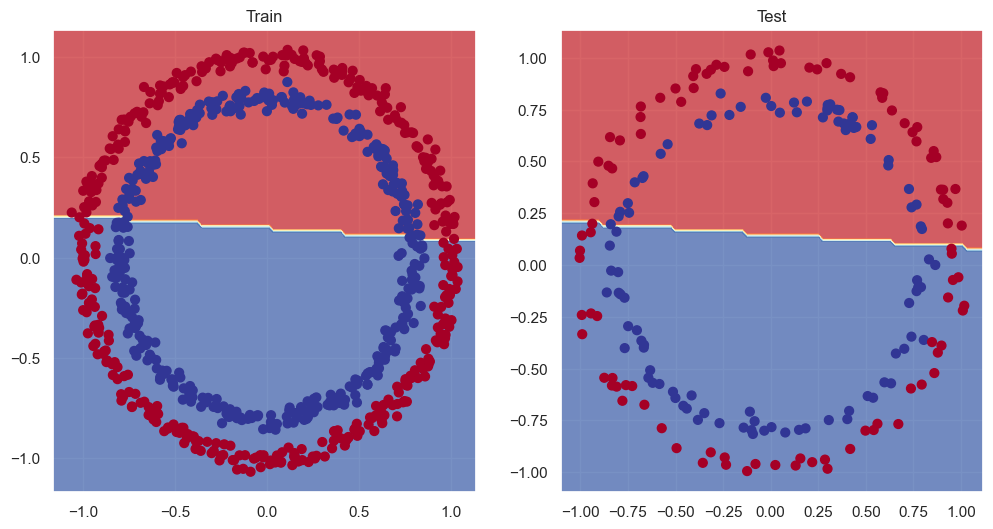

In [27]:
from helper_functions import plot_decision_boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

# Improving the model

In [28]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.layer3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer3(self.layer2(self.layer1(x)))
    
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [29]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [30]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [31]:
X_train.device

device(type='cuda', index=0)

In [32]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
    model_1.train()
    
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if (epoch + 1) % 10 == 0:
        model_1.eval()
        with torch.inference_mode():
            test_logits = model_1(X_test).squeeze()
            test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)

        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {100*acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {100*test_acc:.2f}%")
       

Epoch: 9 | Loss: 0.69504, Accuracy: 50.00% | Test Loss: 0.69435, Test Accuracy: 50.00%
Epoch: 19 | Loss: 0.69410, Accuracy: 56.50% | Test Loss: 0.69369, Test Accuracy: 55.00%
Epoch: 29 | Loss: 0.69373, Accuracy: 51.75% | Test Loss: 0.69347, Test Accuracy: 56.50%
Epoch: 39 | Loss: 0.69356, Accuracy: 49.75% | Test Loss: 0.69338, Test Accuracy: 55.50%
Epoch: 49 | Loss: 0.69347, Accuracy: 50.00% | Test Loss: 0.69335, Test Accuracy: 54.50%
Epoch: 59 | Loss: 0.69341, Accuracy: 49.62% | Test Loss: 0.69333, Test Accuracy: 55.00%
Epoch: 69 | Loss: 0.69337, Accuracy: 49.38% | Test Loss: 0.69333, Test Accuracy: 54.50%
Epoch: 79 | Loss: 0.69333, Accuracy: 49.50% | Test Loss: 0.69333, Test Accuracy: 53.50%
Epoch: 89 | Loss: 0.69330, Accuracy: 49.62% | Test Loss: 0.69333, Test Accuracy: 53.00%
Epoch: 99 | Loss: 0.69327, Accuracy: 49.62% | Test Loss: 0.69334, Test Accuracy: 54.00%
Epoch: 109 | Loss: 0.69325, Accuracy: 49.62% | Test Loss: 0.69335, Test Accuracy: 53.50%
Epoch: 119 | Loss: 0.69323, Accu

In [33]:
next(model_1.parameters()).device

device(type='cuda', index=0)

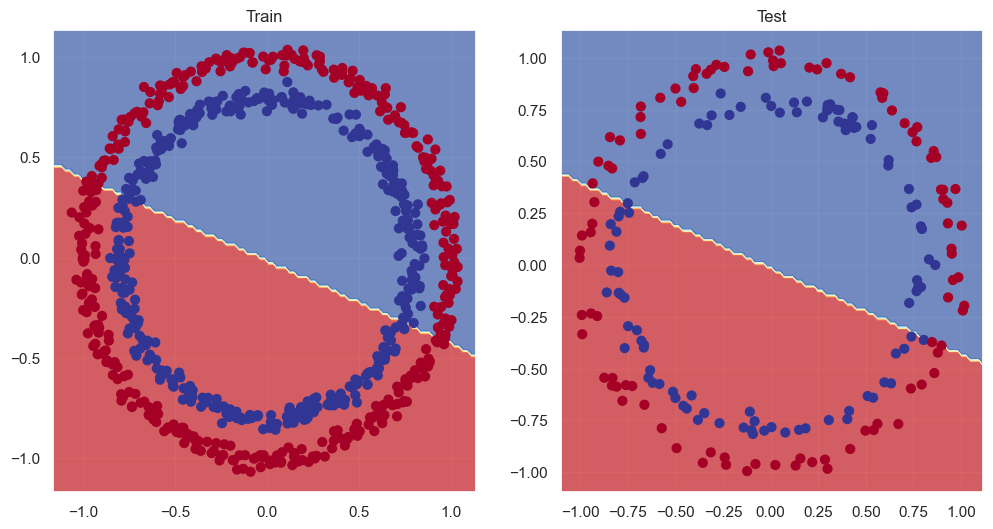

In [34]:
from helper_functions import plot_decision_boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [35]:
next(model_1.parameters()).device

device(type='cuda', index=0)